In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
dogs = pd.read_csv('../datasets/dogs.csv')

In [4]:
dogs

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [5]:
feature_names = dogs.columns[1:]

In [6]:
feature_names

Index(['height', 'weight'], dtype='object')

In [7]:
X = dogs[feature_names]

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(X)

MinMaxScaler()

In [11]:
X = pd.DataFrame(scaler.transform(X), columns=feature_names)

In [12]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=2, n_init='auto')

In [15]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [16]:
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [17]:
kmeans.cluster_centers_

array([[0.43589744, 0.22875817],
       [0.90384615, 0.86928105]])

In [18]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
centers

,height,weight
0,0.435897,0.228758
1,0.903846,0.869281


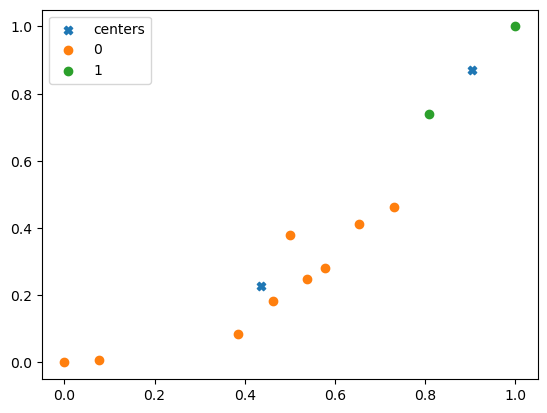

In [21]:
plt.scatter(centers['height'], centers['weight'], marker='X', label='centers')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)

plt.legend()
plt.show()

In [22]:
from sklearn.metrics import silhouette_samples

In [23]:
silhouette_values = silhouette_samples(X, kmeans.labels_)

In [24]:
silhouette_values

array([0.63311803, 0.6561122 , 0.66558095, 0.49228481, 0.58416901,
       0.0300102 , 0.32885172, 0.66221161, 0.59082202, 0.5334069 ,
       0.55473224])

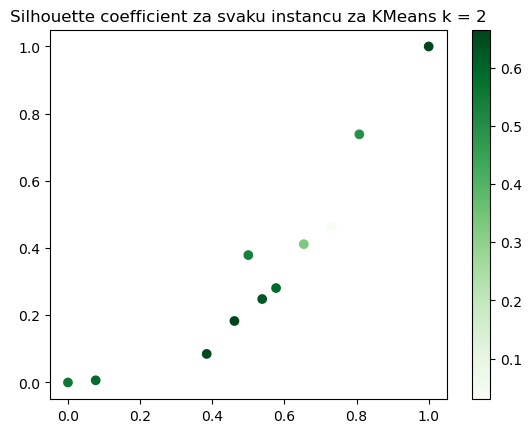

In [25]:
plt.scatter(X['height'], X['weight'], c=silhouette_values, cmap='Greens')
plt.colorbar()
plt.title('Silhouette coefficient za svaku instancu za KMeans k = 2')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

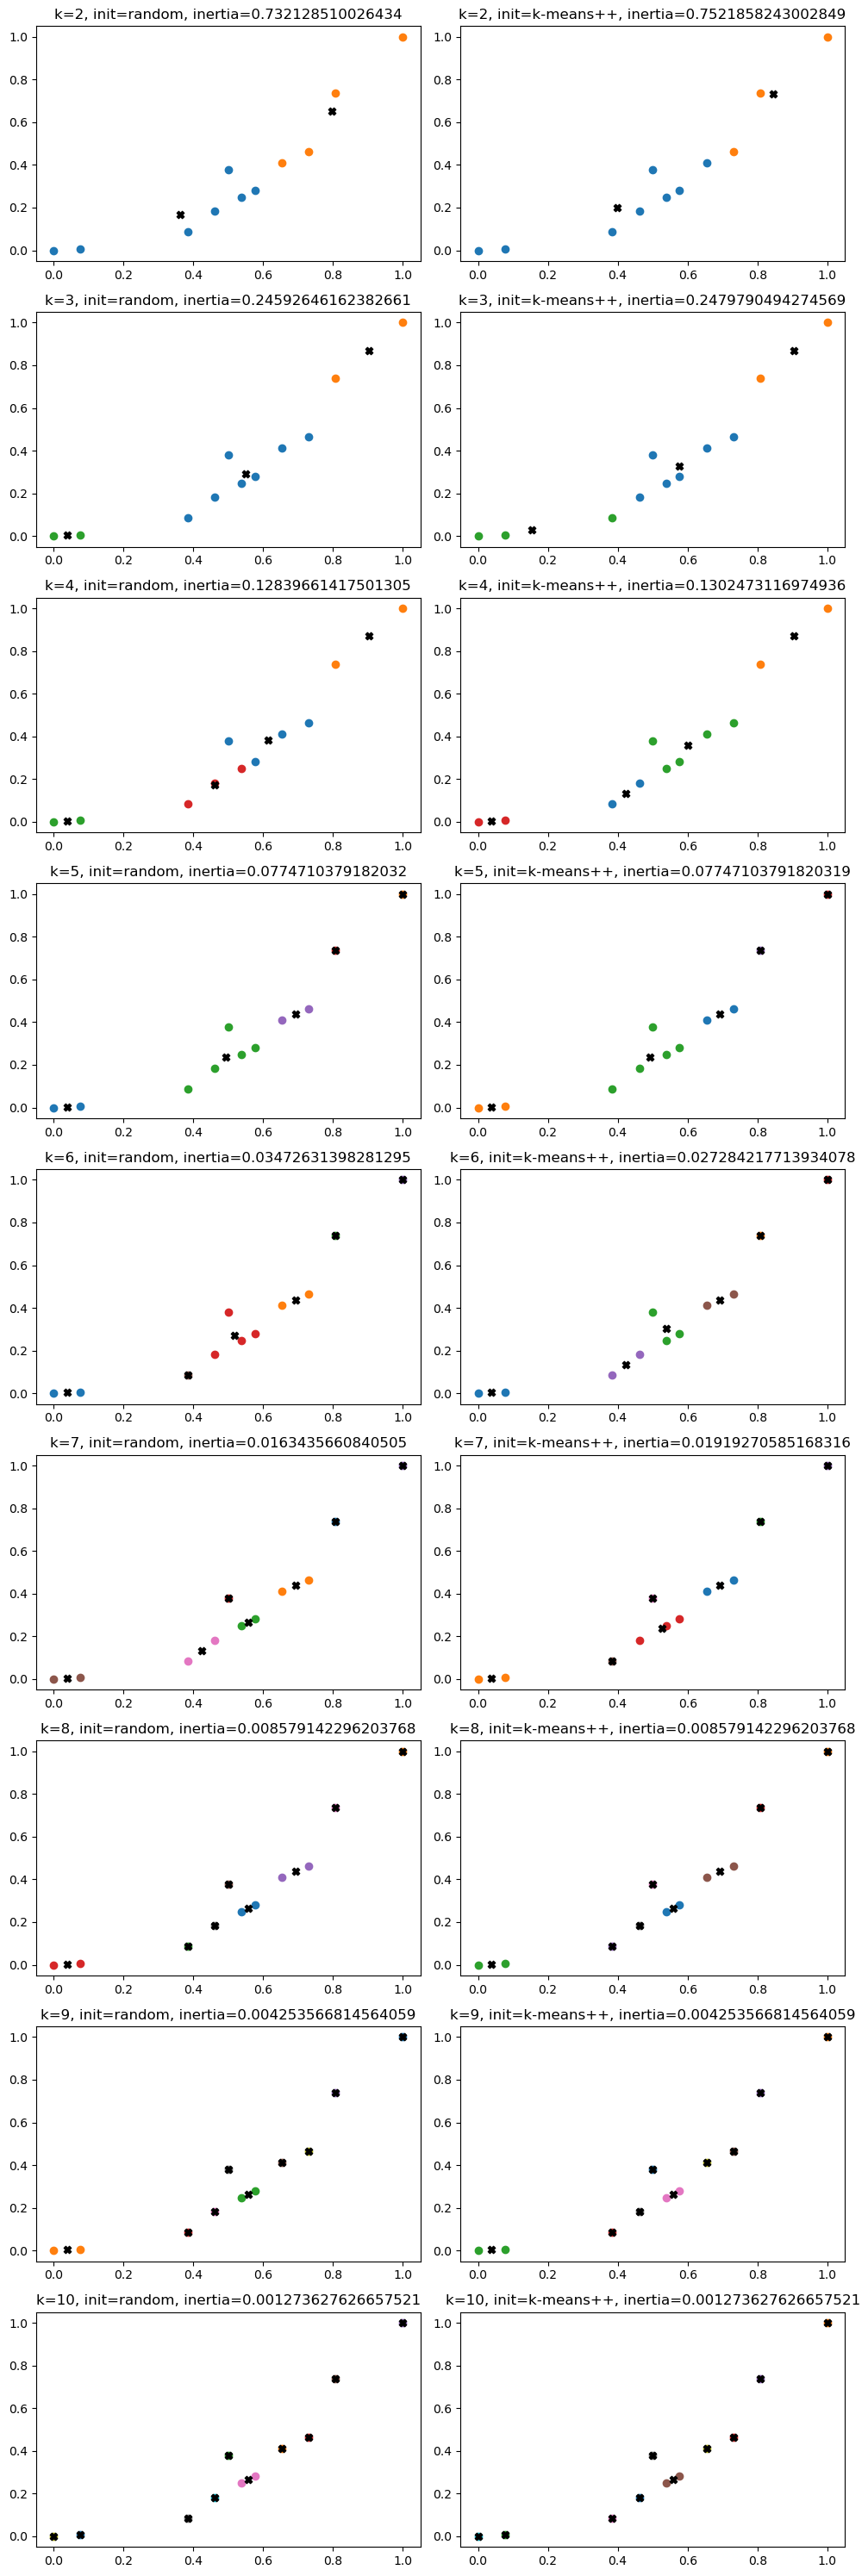

In [28]:
ks = range(2, X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
idx = 1
silhouette = []
inertias = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, n_init='auto', init=init)
        kmeans.fit(X)
        
        if init == 'k-means++':
            silhouette.append(silhouette_score(X, kmeans.labels_))
            inertias.append(kmeans.inertia_)
            
        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1

        for c in range(k):
            elems = X[kmeans.labels_ == c]
            plt.scatter(elems['height'], elems['weight'])

        centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
        plt.scatter(centers['height'], centers['weight'], marker='X', color='black')
        
        plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_}')
        
plt.tight_layout()        

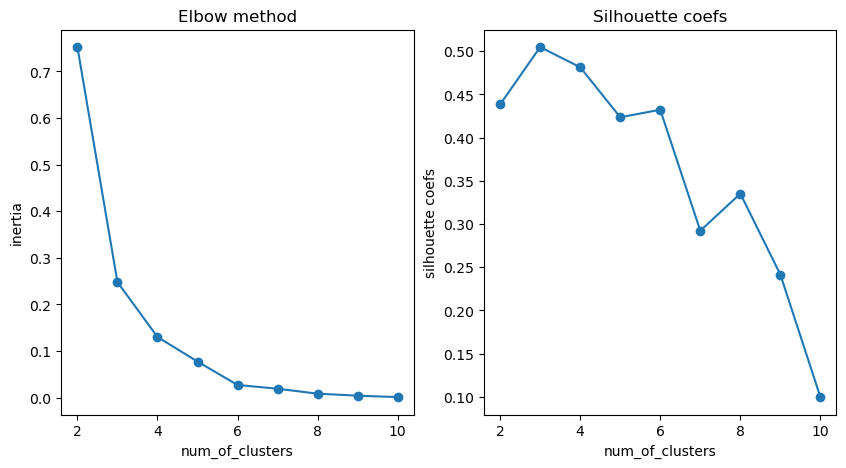

In [29]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.xlabel('num_of_clusters')
plt.ylabel('inertia')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker='o')
plt.xlabel('num_of_clusters')
plt.ylabel('silhouette coefs')
plt.title('Silhouette coefs')

plt.show()